# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. import data

In [2]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [4]:
df.describe().round(2).reset_index(level=0)

,index,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,count,2.000000e+03,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
1,mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
2,std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
3,min,1.000000e+08,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
4,25%,1.000005e+08,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
5,50%,1.000010e+08,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
6,75%,1.000015e+08,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
7,max,1.000020e+08,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [5]:
print('男女人數')
df.groupby(by='Sex',as_index=False).size()\
  .rename({'size':'cnt'}, axis=1)


男女人數


,Sex,cnt
0,0,1086
1,1,914


In [6]:
# 1. 讀取與標準化
df = pd.read_csv('segmentation_data.csv').drop(columns=['ID'])
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [7]:

from sklearn.decomposition import PCA
import numpy as np

pca_10d = PCA(7, random_state=123)
pca_10d.fit(df_std)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06, 0.04, 0.02])

In [8]:
sum(pca_10d.explained_variance_ratio_.tolist()[:2]) # 前2大主成分就已解釋了100多位英雄數值中近6成的差異

0.6194725095733014

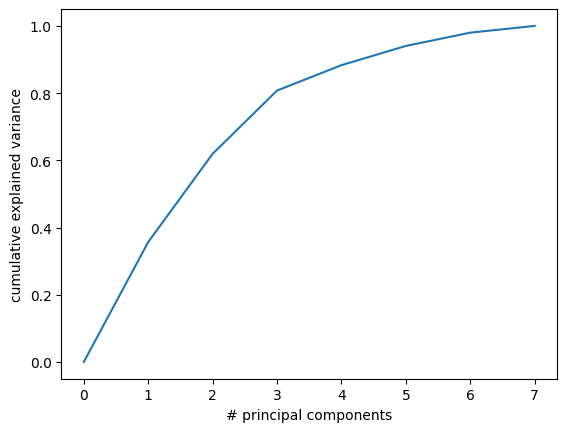

In [9]:
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_10d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

In [10]:
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(df_std)

In [11]:
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
std,0.50,0.5,11.72,0.60,38108.82,0.64,0.81


In [12]:
pcs = np.array(pca.components_)
print("PCA 算出來的欄位數:", pcs.shape[1])
print("你準備給它的名字數量:", len(df.columns))
df_pc = pd.DataFrame(pcs, columns=df.columns)
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")

PCA 算出來的欄位數: 7
你準備給它的名字數量: 7


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
第一主成分,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
第二主成分,0.46,0.51,0.31,0.64,0.12,0.015,-0.07


* 第一主成分：代表「魔力型英雄」。攻擊距離較長，魔力相關屬性較高，但其生命、物理能力及防禦相關數據較低。
* 第二主成分：代表「物理型英雄」。魔力相關屬性較低，但物理相關能力較高。
正負號：代表相關的方向。正值越高，表示該變數與主成分正相關；負值則表示負相關。
數值大小：絕對值越大（通常 > 0.3 或 0.4），代表該變數對這個主成分的貢獻度越高，也就是這個主成分的「靈魂所在」。

2. 第一主成分 (PC1) 的含意：「事業與經濟實力」
看第一橫列（第一主成分），數值較大的欄位有：
Income (0.52)、Occupation (0.49)、Settlement size (0.46)、Age (0.33)
【解讀】 這個指標主要反映了一個人的社會經濟地位。
如果一個人在 PC1 的得分很高，代表他通常年紀較大、收入較高、職業等級較高（管理職或專業人士），且居住在大城市。
Sex (-0.31) 是負值，這代表在這個維度上，男性（編碼為 0）的權重稍微偏向高經濟實力端。

看第二橫列（第二主成分），數值較大的欄位有：
Education (0.64)、Marital status (0.51)、Sex (0.46)、Age (0.31)
【解讀】 這個指標主要反映了一個人的教育背景與家庭狀態。
如果一個人在 PC2 的得分很高，代表他受教育程度較高（研究生、大學）、通常是非單身狀態、且女性（編碼為 1）的比例較高。
有趣的是，Income (0.12) 和 Occupation (0.01) 在這裡幾乎沒有貢獻。這說明 PC2 捕捉的是與錢財無關，而是與學識、性別、婚姻狀態有關的特徵。

主成分,核心影響因素,建議命名
第一主成分 (PC1),收入、職業、居住城市、年齡,經濟實力指標
第二主成分 (PC2),教育程度、婚姻狀況、性別,教育背景指標

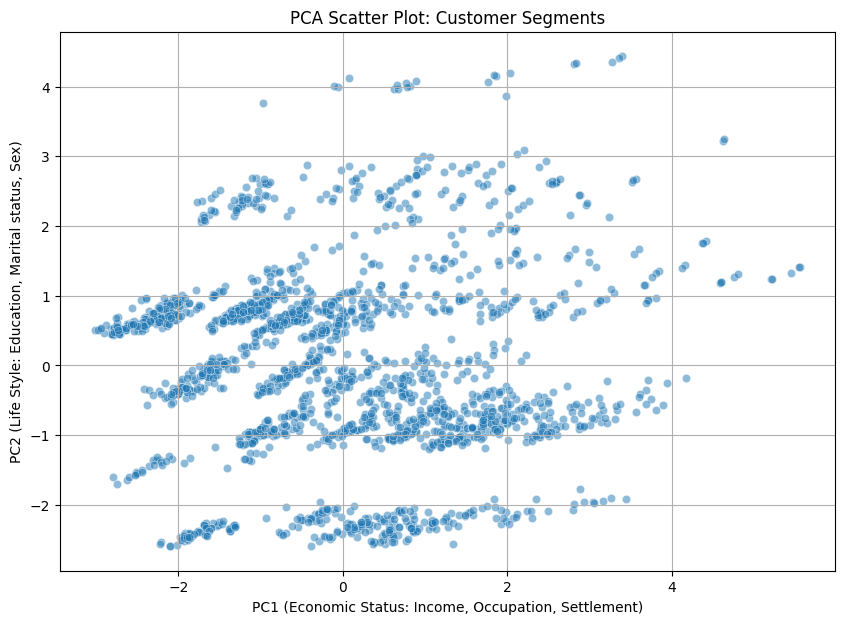

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 將 PCA 轉換後的結果轉為 DataFrame
df_pca_result = pd.DataFrame(pca_trans, columns=['PC1', 'PC2'])

# 繪圖
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_result, alpha=0.5)

# 加上座標軸含意（根據我們剛才的分析）
plt.title('PCA Scatter Plot: Customer Segments')
plt.xlabel('PC1 (Economic Status: Income, Occupation, Settlement)')
plt.ylabel('PC2 (Life Style: Education, Marital status, Sex)')
plt.grid(True)
plt.show()

(np.float64(-3.4416480749506206),
 np.float64(5.979809025376065),
 np.float64(-2.942970822187512),
 np.float64(4.7858877851200345))

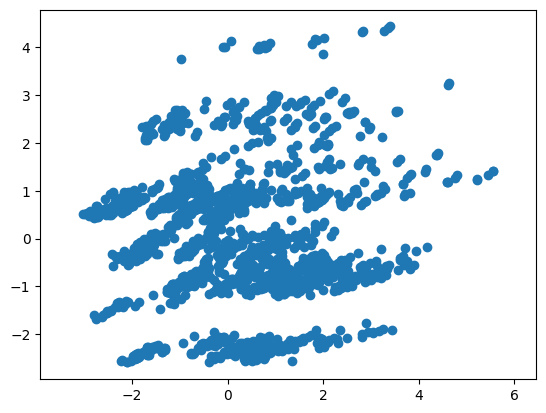

In [14]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal')

In [15]:
peo_tb = pd.DataFrame(pca_trans, columns=['Pepore1', 'Pepore'])

peo_tb = pd.concat([df.reset_index(drop=True), peo_tb], axis=1)
peo_tb

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Pepore1,Pepore
0,0,0,67,2,124670,1,2,2.514746,0.834122
1,1,1,22,1,150773,1,2,0.344935,0.598146
2,0,0,49,1,89210,0,0,-0.651063,-0.680093
3,0,0,45,1,171565,1,1,1.714316,-0.579927
4,0,0,53,1,149031,1,1,1.626745,-0.440496
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330
1996,1,1,27,1,117744,1,0,-1.114957,0.794727
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937
1998,1,1,24,1,97968,0,0,-2.241453,0.627108


方法二 MDS

In [16]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

mds = MDS(n_components=2)
mds_trans = mds.fit_transform(df_std)

c:\Users\b7899\Eva_study\.venv\Lib\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
c:\Users\b7899\Eva_study\.venv\Lib\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


In [17]:
mds_tb = pd.DataFrame(mds_trans, columns=['dim1', 'dim2'])

df_mds_tb = pd.concat([df.reset_index(drop=True), mds_tb], axis=1)
df_mds_tb

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,dim1,dim2
0,0,0,67,2,124670,1,2,-0.842469,-3.669102
1,1,1,22,1,150773,1,2,-2.023387,-0.573447
2,0,0,49,1,89210,0,0,2.141800,1.098596
3,0,0,45,1,171565,1,1,0.626439,-1.823241
4,0,0,53,1,149031,1,1,0.644842,-1.809817
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1.104271,1.825331
1996,1,1,27,1,117744,1,0,-1.047465,1.302675
1997,0,0,31,0,86400,0,0,2.741449,1.312511
1998,1,1,24,1,97968,0,0,-0.674505,2.448585


MDS visualization:


c:\Users\b7899\Eva_study\.venv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


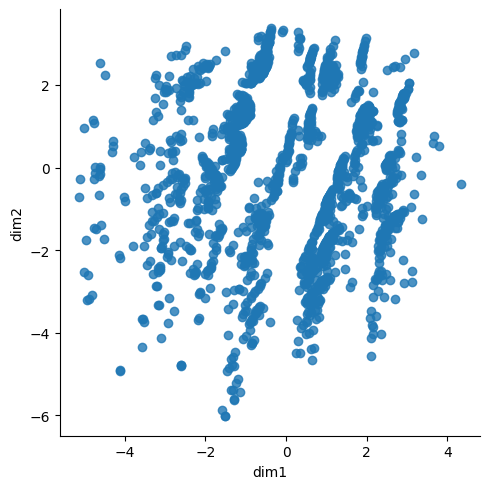

In [18]:
print('MDS visualization:')
sns.lmplot(data=df_mds_tb, x='dim1', y='dim2', 
                   fit_reg=False, legend=True, legend_out=True)

: 

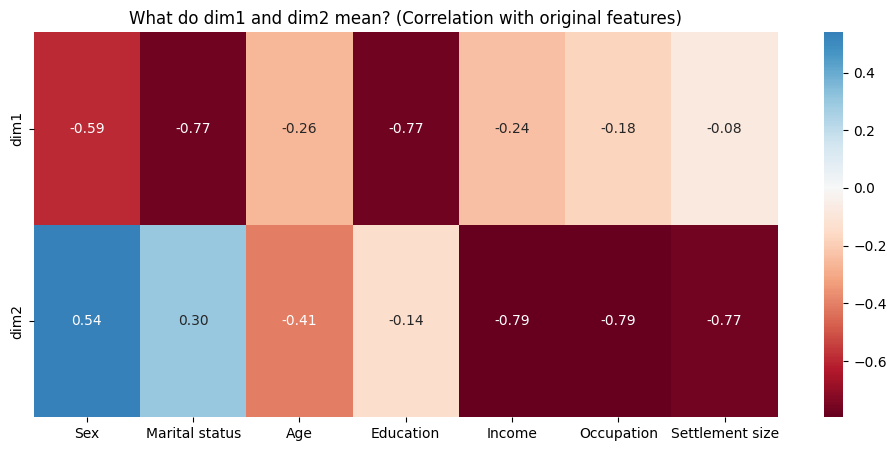

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 將 MDS 結果轉為 DataFrame
mds_tb = pd.DataFrame(mds_trans, columns=['dim1', 'dim2'])

# 2. 【核心修正】將 df_std 也轉為 DataFrame
# 這裡使用 df.columns 是假設你的原始資料 df 包含那 7 個特徵的名稱
df_std_df = pd.DataFrame(df_std, columns=df.columns)

# 3. 合併兩者 (因為兩者都是新建立的 DataFrame，Index 都是從 0 開始，直接合併即可)
cor_df = pd.concat([mds_tb, df_std_df], axis=1)

# 4. 計算相關係數矩陣
# 我們看 dim1, dim2 與原始特徵之間的關係
correlation_matrix = cor_df.corr().loc[['dim1', 'dim2']].drop(['dim1', 'dim2'], axis=1)

# 5. 繪製熱力圖
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f")
plt.title('What do dim1 and dim2 mean? (Correlation with original features)')
plt.show()

DBSCAN

In [20]:
pca_trans

array([[ 2.51474593,  0.83412239],
       [ 0.34493528,  0.59814564],
       [-0.65106267, -0.68009318],
       ...,
       [-1.45229829, -2.23593665],
       [-2.24145254,  0.62710847],
       [-1.86688505, -2.45467234]], shape=(2000, 2))

In [21]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5,min_samples=4,metric='euclidean')

In [22]:
pca_model_dbscan = db.fit(pca_trans)

* eps=3：定義「兩個點之間的最大距離」以被視為鄰居，控制群的密度感知範圍。    
* min_samples=4：一個點及其鄰居數量至少為 4 才能被認定為核心點。    
* metric='euclidean'：使用歐幾里得距離作為距離度量標準。    

In [30]:
label_pca=pca_model_dbscan.labels_

In [31]:
label_pca

array([0, 0, 1, ..., 1, 0, 1], shape=(2000,))

In [32]:
from sklearn import metrics

# 創建一個布爾陣列，長度與 label 一樣，所有值初始化為 False
sample_cores=np.zeros_like(label_pca, dtype=bool)

# 將核心點對應的索引值設為 True，以標記哪些數據點是核心點。
sample_cores[db.core_sample_indices_]=True

# 若存在噪聲點（標籤為 -1），從簇數中減去 1。 輸出「有效簇數」，不包括噪聲點
n_clusters=len(set(label_pca))- (1 if -1 in label_pca else 0)
print('No of clusters:',n_clusters)

No of clusters: 5


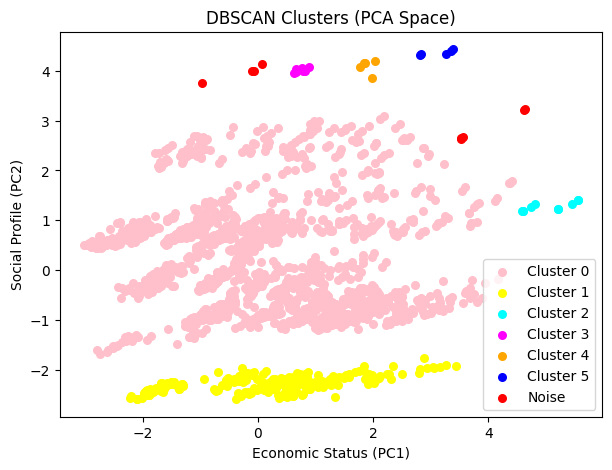

In [33]:
y_means = db.fit_predict(pca_trans)
plt.figure(figsize=(7,5))

# 前 6 群 (0 到 5)
plt.scatter(pca_trans[y_means == 0, 0], pca_trans[y_means == 0, 1], s = 30, c = 'pink', label='Cluster 0')
plt.scatter(pca_trans[y_means == 1, 0], pca_trans[y_means == 1, 1], s = 30, c = 'yellow', label='Cluster 1')
plt.scatter(pca_trans[y_means == 2, 0], pca_trans[y_means == 2, 1], s = 30, c = 'cyan', label='Cluster 2')
plt.scatter(pca_trans[y_means == 3, 0], pca_trans[y_means == 3, 1], s = 30, c = 'magenta', label='Cluster 3')
plt.scatter(pca_trans[y_means == 4, 0], pca_trans[y_means == 4, 1], s = 30, c = 'orange', label='Cluster 4')
plt.scatter(pca_trans[y_means == 5, 0], pca_trans[y_means == 5, 1], s = 30, c = 'blue', label='Cluster 5')

# 修正噪音點：標籤設為 -1，並確保 X 是 index 0, Y 是 index 1
plt.scatter(pca_trans[y_means == -1, 0], pca_trans[y_means == -1, 1], s = 30, c = 'red', label='Noise') 

plt.xlabel('Economic Status (PC1)') # 收入/職業/城市規模
plt.ylabel('Social Profile (PC2)')   # 教育/婚姻/性別
plt.title('DBSCAN Clusters (PCA Space)')
plt.legend()
plt.show()

把MDS的資料放進DBSCAN

In [35]:
mds_model_dbscan = db.fit(mds_trans)

In [36]:
label_mds=mds_model_dbscan.labels_

In [37]:
label_mds

array([0, 0, 1, ..., 1, 0, 1], shape=(2000,))

In [38]:
from sklearn import metrics

# 創建一個布爾陣列，長度與 label 一樣，所有值初始化為 False
sample_cores=np.zeros_like(label_mds, dtype=bool)

# 將核心點對應的索引值設為 True，以標記哪些數據點是核心點。
sample_cores[db.core_sample_indices_]=True

# 若存在噪聲點（標籤為 -1），從簇數中減去 1。 輸出「有效簇數」，不包括噪聲點
n_clusters=len(set(label_pca))- (1 if -1 in label_pca else 0)
print('No of clusters:',n_clusters)

No of clusters: 5


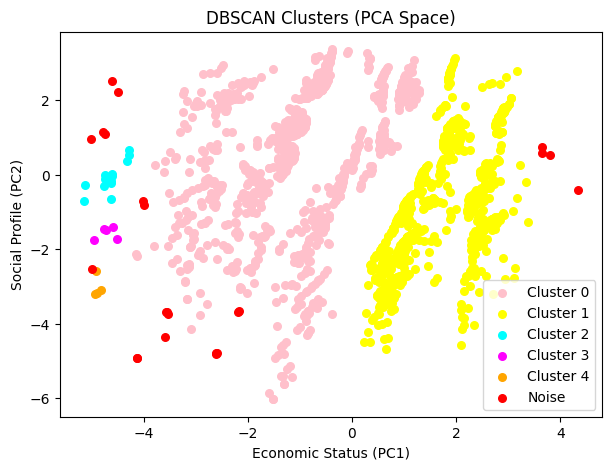

In [39]:
y_means = db.fit_predict(mds_trans)
plt.figure(figsize=(7,5))

# 前 6 群 (0 到 5)
plt.scatter(mds_trans[y_means == 0, 0], mds_trans[y_means == 0, 1], s = 30, c = 'pink', label='Cluster 0')
plt.scatter(mds_trans[y_means == 1, 0], mds_trans[y_means == 1, 1], s = 30, c = 'yellow', label='Cluster 1')
plt.scatter(mds_trans[y_means == 2, 0], mds_trans[y_means == 2, 1], s = 30, c = 'cyan', label='Cluster 2')
plt.scatter(mds_trans[y_means == 3, 0], mds_trans[y_means == 3, 1], s = 30, c = 'magenta', label='Cluster 3')
plt.scatter(mds_trans[y_means == 4, 0], mds_trans[y_means == 4, 1], s = 30, c = 'orange', label='Cluster 4')


# 修正噪音點：標籤設為 -1，並確保 X 是 index 0, Y 是 index 1
plt.scatter(mds_trans[y_means == -1, 0], mds_trans[y_means == -1, 1], s = 30, c = 'red', label='Noise') 

plt.xlabel('Economic Status (PC1)') # 收入/職業/城市規模
plt.ylabel('Social Profile (PC2)')   # 教育/婚姻/性別
plt.title('DBSCAN Clusters (PCA Space)')
plt.legend()
plt.show()

### 3.2.1 判斷群數
#### 1. 手肘法則（ElbowMethod）

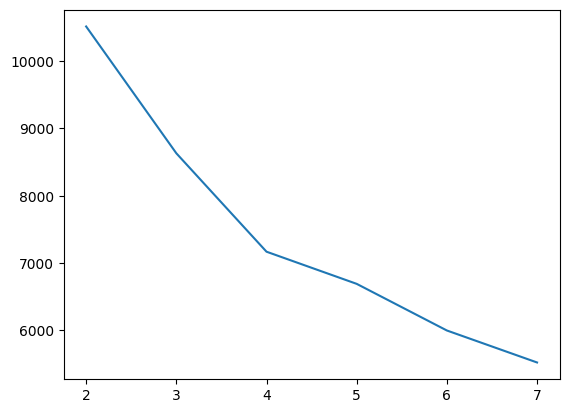

In [40]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8)) #二到8群
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50) #每一次跑出來得值都要一樣
    model_clus.fit(df_std)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd)

#### 2. 輪廓係數法（Silhouette Coefficient）
「找出相同群凝聚度越小、不同群分離度越高」的值     
* 凝聚度（a）是指與相同群內的其他點的平均距離。
* 分離度（b）是指與不同群的其他點的平均距離。 

* 輪廓的取值範圍為[-1, +1]，越接近1表示聚類效果越好，越接近-1表示聚類效果越差；如果輪廓近似為0，則說明該樣本在兩個群的邊界上。   

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 50)
    kmeans.fit(df_std)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.24820216342164297
For n_clusters=3, the silhouette score is 0.2711846855734802
For n_clusters=4, the silhouette score is 0.26879180394522123
For n_clusters=5, the silhouette score is 0.25228612861251776
For n_clusters=6, the silhouette score is 0.25304598106569126
For n_clusters=7, the silhouette score is 0.26251437658462473
For n_clusters=8, the silhouette score is 0.27095176972062074


選3群(silhouette score越大越好)

In [43]:
cluster = KMeans(n_clusters = 3, random_state = 111)
cluster.fit(df_std)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",111
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [ ]:
cluster = KMeans(n_clusters = 3, random_state = 111)
cluster.fit(data_scaled)